# Equipartition Surface Magnetic Field Strengths

Computing equipartition magnetic field strengths using PHOENIX stellar atmosphere models (Hauschildt et al. 1999). 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as scint

We need to import a file with stellar parameters and a table of stellar atmosphere properties in photospheric layers. We approximate the surface equipartition magnetic field strength as the equipartition field strength where the magnetic pressure is equal the gas pressure at a Rossland optical depth $\tau = 1$. This is roughly equivalent to the equipartition field strength in the optical photospheric layers. Stellar parameters will be taken from a non-magnetic stellar model isochrone at an age of 10 Myr.

Start by importing stellar parameters,

In [2]:
iso_10 = np.genfromtxt('../models/iso/std/dmestar_00010.0myr_z+0.00_a+0.00_phx.iso')
iso_20 = np.genfromtxt('../models/iso/std/dmestar_00020.0myr_z+0.00_a+0.00_phx.iso')

Now load a table with the atmospheric gas pressure and temperature at an optical depth $\tau = 1$ for a set of $\log(g)$s and $T_{\rm eff}$s. We'll adopt a solar metallicity to simplify things.

In [3]:
atm = np.genfromtxt('../models/atm/tab/Zp0d0.ap0d0_t001.dat')

Values for the effective temperature of the atmosphere model is tabulated in column 0, but we must define an array with $\log(g)$ values. 

In [4]:
teffs = np.transpose(atm[:, 0])
loggs = np.arange(-0.5, 5.6, 0.5)
print teffs
print loggs

[  2000.   2100.   2200.   2300.   2400.   2500.   2600.   2700.   2800.
   2900.   3000.   3100.   3200.   3300.   3400.   3500.   3600.   3700.
   3800.   3900.   4000.   4100.   4200.   4300.   4400.   4500.   4600.
   4700.   4800.   4900.   5000.   5100.   5200.   5300.   5400.   5500.
   5600.   5700.   5800.   5900.   6000.   6100.   6200.   6300.   6400.
   6500.   6600.   6700.   6800.   6900.   7000.   7200.   7400.   7600.
   7800.   8000.   8200.   8400.   8600.   8800.   9000.   9200.   9400.
   9600.   9800.  10000.]
[-0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]


The atmosphere structure table isn't quite in the correct form for our purposes, as pressures and temperatures are intermingled. We should separate those properties into individual pressure and temperature tables. 

In [5]:
temps = np.empty((len(teffs), len(loggs)))
press = np.empty((len(teffs), len(loggs)))
for i, teff in enumerate(atm[:, 1:]):
    for j, prop in enumerate(teff):
        if prop == 0.:
            prop = np.nan
        else:
            pass
        
        if j%2 == 0:
            press[i, j/2] = prop
        else:
            temps[i, j/2] = prop

With the individual tables formed, we now need to construct interpolation surfaces using a 2D interpolation routine. Note that we only really care about the pressure table, as that sets the equipartition magnetic field strengths.

In [6]:
pres_surface = scint.interp2d(teffs, loggs, np.transpose(press), kind='linear')

We are in a position to compute surface pressures and, by extension, equipartition magnetic field strengths.

In [7]:
B_eq_10 = np.empty((len(iso_10[:62])))
B_eq_20 = np.empty((len(iso_20[:62])))

for i, star in enumerate(iso_10[:62]):
    B_eq_10[i] = np.sqrt(8.0*np.pi*pres_surface(10**star[1], star[2]))

for i, star in enumerate(iso_20[:62]):
    B_eq_20[i] = np.sqrt(8.0*np.pi*pres_surface(10**star[1], star[2]))

See what kind of values we obtain.

In [8]:
B_eq_20

array([ 3255.70259295,  3197.75277866,  3104.90877151,  3042.04747288,
        2987.63381783,  2945.94892581,  2918.78394552,  2889.12668096,
        2863.43251141,  2842.79366961,  2823.47236714,  2805.41882843,
        2790.9935678 ,  2777.2223552 ,  2764.10192619,  2751.43707862,
        2739.67136467,  2728.45628378,  2717.35017736,  2706.21319132,
        2694.641813  ,  2682.98057964,  2670.48173709,  2656.86866693,
        2642.22820439,  2626.92486056,  2610.9243601 ,  2593.62398531,
        2574.8009345 ,  2555.46370369,  2534.64813292,  2511.94335633,
        2487.68201014,  2461.18815928,  2432.40739338,  2402.77947954,
        2369.65188834,  2337.40859042,  2301.83671821,  2261.6174351 ,
        2216.17505574,  2166.06166111,  2115.70024909,  2069.10921938,
        2026.37885264,  1989.78581994,  1957.09098578,  1925.24250737,
        1872.91627536,  1761.44967247,  1597.89610568,  1435.99141856,
        1366.36164247,  1401.75668807,  1363.90387156,  1268.1588285 ,
      

These values match estimates from convective energy equiparition and observational measurements (e.g., Saar). The general trend is that equipartition field strengths decrease toward higher masses/temperatures, which matches intuition since surface gas pressures decrease as stellar surface layers become more extended and fluffy. 

We can visualize this:

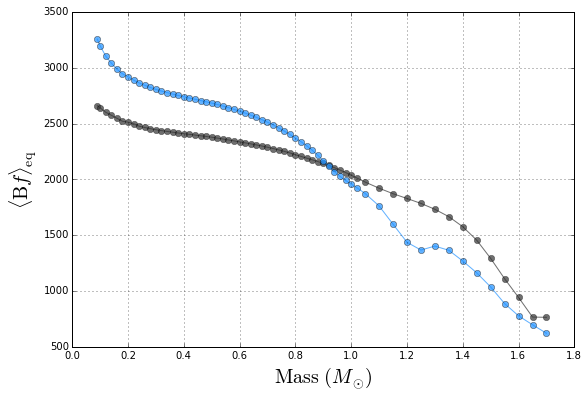

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(9., 6.))

ax.set_xlabel('${\\rm Mass}\ (M_{\\odot})$', fontsize=20)
ax.set_ylabel('$\\langle {\\rm B}f \\rangle_{\\rm eq}$', fontsize=20)
ax.grid()

ax.plot(iso_10[:62, 0], B_eq_10, 'o-', lw=1, color='#333333', alpha=0.7)
ax.plot(iso_20[:62, 0], B_eq_20, 'o-', lw=1, color='#1e90ff', alpha=0.7)

and as a function of effective temperature:

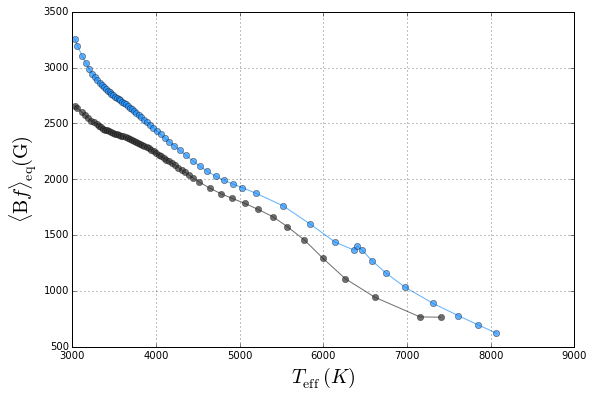

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(9., 6.))

ax.set_xlabel('$T_{\\rm eff}\ (K)$', fontsize=20)
ax.set_ylabel('$\\langle {\\rm B}f \\rangle_{\\rm eq} ({\\rm G})$', fontsize=20)
ax.grid()

ax.plot(10**iso_10[:62, 1], B_eq_10, 'o-', lw=1, color='#333333', alpha=0.7)
ax.plot(10**iso_20[:62, 1], B_eq_20, 'o-', lw=1, color='#1e90ff', alpha=0.7)

For the manuscript, there is a table of stellar properties and the resulting equipartition surface magnetic field strengths. Here is that table,

In [11]:
for i, star in enumerate(iso_10[:62]):
    if int(star[0]*100.)%10 == 0:
        print '{:5.1f} & {:6.0f} & {:6.2f} & {:6.2f} \\\\'.format(star[0], 10**star[1], star[2], B_eq_10[i]/1.0e3)
    else:
        pass

  0.1 &   3060 &   4.16 &   2.64 \\
  0.2 &   3261 &   4.19 &   2.51 \\
  0.3 &   3396 &   4.20 &   2.44 \\
  0.4 &   3517 &   4.22 &   2.41 \\
  0.5 &   3639 &   4.24 &   2.38 \\
  0.6 &   3760 &   4.26 &   2.34 \\
  0.7 &   3888 &   4.28 &   2.29 \\
  0.8 &   4031 &   4.29 &   2.22 \\
  0.9 &   4195 &   4.30 &   2.14 \\
  1.0 &   4397 &   4.30 &   2.04 \\
  1.1 &   4641 &   4.30 &   1.92 \\
  1.2 &   4910 &   4.28 &   1.83 \\
  1.3 &   5214 &   4.25 &   1.73 \\
  1.4 &   5569 &   4.19 &   1.58 \\
  1.5 &   5995 &   4.06 &   1.29 \\
  1.6 &   6618 &   3.96 &   0.94 \\
  1.7 &   7403 &   4.15 &   0.76 \\


When running models, an interpolation curve is constructed from the data in the table to find the equipartition value as a function of mass. Let's construct that curve.

In [12]:
B_eq_curve_data = np.empty((17, 2))
j = 0
for i, star in enumerate(iso_10[:62]):
    if int(star[0]*100.)%10 == 0:
        B_eq_curve_data[j, 0] = star[0]
        B_eq_curve_data[j, 1] = B_eq_10[i]
        j += 1
    else:
        pass

B_eq_interp_curve = scint.interp1d(B_eq_curve_data[:, 0], B_eq_curve_data[:, 1], kind='cubic', axis=0)

Now we can compare the accuracy of the interpolated curve.

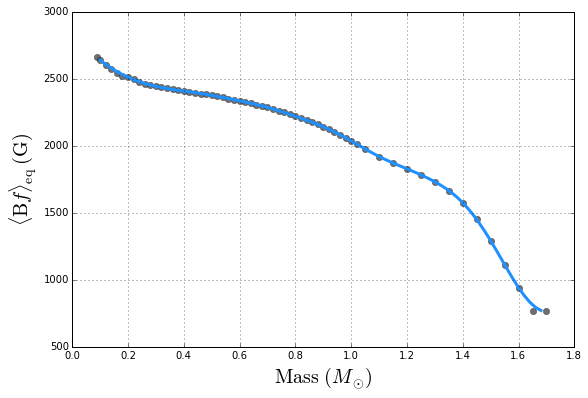

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(9., 6.))

ax.set_xlabel('${\\rm Mass}\ (M_{\\odot})$', fontsize=20)
ax.set_ylabel('$\\langle {\\rm B}f \\rangle_{\\rm eq}\ ({\\rm G})$', fontsize=20)
ax.grid()

ax.plot(iso_10[:62, 0], B_eq_10, 'o', lw=1, color='#333333', alpha=0.7)
ax.plot(np.arange(0.1, 1.7, 0.02), B_eq_interp_curve(np.arange(0.1, 1.7, 0.02)), '-', lw=3, color='#1e90ff')

Surface magnetic field strengths are a over-estimated just prior to the ZAMS. Otherwise, the interpolated curve looks to reproduce the origianal data to a high degree.